<a href="https://colab.research.google.com/github/omarreess/DLI-Internship-Data-Science/blob/main/Assignment%206%20-%20Linear%20Regression%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> <center> Linear Regression Assignment

<h2> Importing

In [ ]:
import numpy as np 
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  mean_squared_error, mean_absolute_error, r2_score , mean_absolute_percentage_error
from matplotlib import pyplot as plt 
import seaborn as sns 


<h2> Importing Dataset

In [ ]:
dataset = pd.read_csv('/content/50_Startups - 50_Startups.csv')
dataset.head()



,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


<h2> Exploring Data

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            49 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


<h2> Check Empty Cells

In [ ]:
dataset.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              1
Profit             0
dtype: int64

<h2> Handling Missing Data


As the empty cells ratio very small corresponding to rest of data

In [ ]:

dataset.dropna(inplace=True )
dataset.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

<h2> Labeling Categorical Data

In [ ]:

dataset['State']= LabelEncoder().fit_transform(dataset['State'],)
dataset.tail()


,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,2,64926.08
46,1315.46,115816.21,297114.46,1,49490.75
47,0.00,135426.92,0.00,0,42559.73
48,542.05,51743.15,0.00,2,35673.41
49,0.00,116983.80,45173.06,0,14681.40


<h3> Splitting The Dataset ( 75% Training , 25% Testing )

In [ ]:
# Splitting  
features_cols = dataset.iloc[:,:-1].values
print(f' Data features : {dataset.columns[:-1].values}')

output_col = dataset.iloc[:,-1].values
print(f' Output data : {dataset.columns[-1]} \n ')



features_train, features_test, output_train, output_test = train_test_split (features_cols, output_col,
   test_size = 0.25,   
   random_state = 0,)


# Checking Data Ranges

print(f"Features its max : {features_train.max()} \n\nits min : {features_train.min()}" )



 Data features : ['R&D Spend' 'Administration' 'Marketing Spend' 'State']
 Output data : Profit 
 
Features its max : 471784.1 

its min : 0.0


<H2> Normalizing Data

In [ ]:

normalizing_scaller =MinMaxScaler()  
normalizing_scaller.fit(features_train)
features_cols_train_normlized = normalizing_scaller.transform(features_train) 
features_cols_test_normlized = normalizing_scaller.transform(features_test) 

print(f"Normlized Features its max : \n{features_cols_train_normlized.max()} \n\nits min : \n{features_cols_train_normlized.min()}" )


Normlized Features its max : 
1.0 

its min : 
0.0


<H2> Training The Data

In [ ]:
# Train
regressor = LinearRegression() 
regressor.fit(features_cols_train_normlized, output_train)
# Predict
output_predicted = regressor.predict(features_cols_test_normlized)


<H2> Visualizing Relation Between Actual & Predicted Output

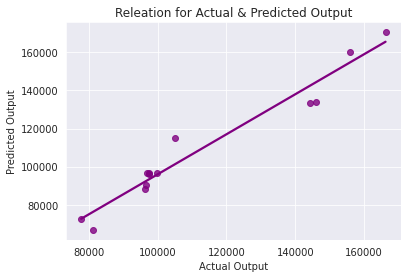

In [ ]:

sns.set_style("darkgrid")
sns.regplot(x=output_test,y=output_predicted,ci=None,color ='purple',fit_reg=True);
plt.title("Releation for Actual & Predicted Output")
plt.xlabel("Actual Output")
plt.ylabel("Predicted Output")
plt.show()

<h2> Getting Error Metrics 

In [ ]:
R_squared = r2_score(output_test, output_predicted)
MSE = mean_squared_error(output_test, output_predicted)
RMSE = mean_squared_error(output_test, output_predicted, squared=False) 
MAE = mean_absolute_error(output_test, output_predicted)
MAPE =	mean_absolute_percentage_error(output_test, output_predicted)
 
print(f'R-squared: {round(R_squared*100,2)}%') 
print(f'MAE: {round(MAE,2)}')
print(f'MSE: {round(MSE,2)}')
print(f'RMSE: {round(RMSE,2)}') 
print(f'MAPE: {round(MAPE*100,2)}%')



R-squared: 92.61%
MAE: 6345.34
MSE: 59620584.18
RMSE: 7721.44
MAPE: 5.91%


<h2> Filling Dataset with Predicted data

In [ ]:
# Fill dataset with prediected data
features_cols_normlized = normalizing_scaller.transform(features_cols) 
output_all_predicted = regressor.predict(features_cols_normlized)

dataset['Prediected Profit'] = [round(i) for i in output_all_predicted ]
dataset

,R&D Spend,Administration,Marketing Spend,State,Profit,Prediected Profit
0,165349.20,136897.80,471784.10,2,192261.83,193504
1,162597.70,151377.59,443898.53,0,191792.06,190927
2,153441.51,101145.55,407934.54,1,191050.39,181344
3,144372.41,118671.85,383199.62,2,182901.99,173191
4,142107.34,91391.77,366168.42,1,166187.94,170613
5,131876.90,99814.71,362861.36,2,156991.12,162276
6,134615.46,147198.87,127716.82,0,156122.51,156209
7,130298.13,145530.06,323876.68,1,155752.60,160349
8,120542.52,148718.95,311613.29,2,152211.77,151960
9,123334.88,108679.17,304981.62,0,149759.96,153864
